# Hypothesis

## I believe that in most countries, most students who enroll in secondary school complete all lower secondary courses. Therefore, I expect to find a moderately high correlation between the percent net of secondary school enrollment, and the percent total of lower secondary completion rate.


First, I will import pandas with an easy to use alias (pd), and rename the two Worldbank indicators I plan on using in this exploration to make the code less cryptic and easier to follow. I will also write a named constant DATA_FILE_PATH to access the Worldbank data in my workspace.

In [1]:
#!{sys.executable} -m pip install pandas

In [2]:
import pandas as pd

SECONDARY_ENROLLMENT = "SE.SEC.NENR"
SECONDARY_COMPLETION_RATE = "SE.SEC.CMPT.LO.ZS"
DATA_FILE_PATH = "../../data/databank_education_2018.csv"


### Secondly, I will read the data in the CSV file into a DataFrame with Pandas’ read_csv function.

In [3]:
worldbank_data = pd.read_csv(DATA_FILE_PATH)


### Then, I will print the shape of the DataFrame and display the first 10 rows.

In [4]:
shape = worldbank_data.shape
head = worldbank_data.head(10)

print(f"This file has {shape[0]} rows, and {shape[1]} columns.")
print(f"The first ten rows of the data are: \n{head}")

the file has 244 rows, and 94 columns.
The first ten rows of the data are: 
               Country  SE.COM.DURS  SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  \
0          Afghanistan          9.0            0.66691            0.63602   
1              Albania          9.0            1.03765            1.01730   
2              Algeria         10.0            0.95499                NaN   
3              Andorra         10.0                NaN                NaN   
4               Angola          6.0                NaN                NaN   
5  Antigua and Barbuda         11.0            0.99208            0.97924   
6           Arab World          9.0            0.94617            0.94833   
7            Argentina         14.0                NaN                NaN   
8              Armenia         12.0            0.99961            1.02283   
9                Aruba         13.0                NaN                NaN   

   SE.ENR.SECO.FM.ZS  SE.ENR.TERT.FM.ZS  SE.PRE.DURS  SE.PRE.ENRL.TC.ZS  \
0

### I will now narrow the DataFrame to only  three columns: Country, secondary enrollment (SE.SEC.NENR), and secondary completion rate (SE.SEC.CMPT.LO.ZS), and display the first 10 rows of the data.

In [5]:
analysis_data = worldbank_data[["Country", SECONDARY_ENROLLMENT, SECONDARY_COMPLETION_RATE]]
head = analysis_data.head(10)

print(f"The first ten rows of the data are: \n{head}")

The first ten rows of the data are: 
               Country  SE.SEC.NENR  SE.SEC.CMPT.LO.ZS
0          Afghanistan     50.14070          55.346420
1              Albania     86.60827          96.334824
2              Algeria          NaN          84.641312
3              Andorra          NaN                NaN
4               Angola          NaN                NaN
5  Antigua and Barbuda     88.78981          98.648651
6           Arab World     63.51428          68.632538
7            Argentina          NaN                NaN
8              Armenia          NaN          93.292198
9                Aruba          NaN                NaN


### Next, I'm filtering the data and eliminating any rows that contain NaN. I'm also displaying the resulting shape and first 10 rows of the data.

In [6]:
mask = analysis_data[analysis_data["Country"].notna() & analysis_data[SECONDARY_ENROLLMENT].notna() & analysis_data[SECONDARY_COMPLETION_RATE].notna()]

shape = mask.shape
head = mask.head(10)

print(f"This file has {shape[0]} rows, and {shape[1]} columns.")
print(f"The first ten rows of the data are: \n{head}")


the file has 97 rows, and 3 columns.
The first ten rows of the data are: 
                Country  SE.SEC.NENR  SE.SEC.CMPT.LO.ZS
0           Afghanistan     50.14070          55.346420
1               Albania     86.60827          96.334824
5   Antigua and Barbuda     88.78981          98.648651
6            Arab World     63.51428          68.632538
12           Azerbaijan     88.53256          84.713097
14              Bahrain     90.19346          94.314293
15           Bangladesh     66.54968          87.965874
17              Belarus     95.63948          97.840889
19               Belize     71.14900          67.190048
22               Bhutan     70.19893          82.485001


### In this cell I will reorganize in a new variable the values of secondary enrollment (SE.SEC.NENR) in descending order, and display the first 10 rows of data containing the largest ones.

In [7]:
sorted_data = mask.sort_values(by=SECONDARY_ENROLLMENT, ascending=False)

head = sorted_data.head(10)
print(f"The first ten rows of the data are: \n{head}")

The first ten rows of the data are: 
                  Country  SE.SEC.NENR  SE.SEC.CMPT.LO.ZS
111            Kazakhstan     99.83695         113.610764
189          Saudi Arabia     96.36052         104.640389
169                  Oman     96.19256         103.548927
92   Hong Kong SAR, China     96.14117         106.703507
79                Georgia     95.94754         101.809448
17                Belarus     95.63948          97.840889
163         North America     93.06775          94.788361
191                Serbia     92.06535          97.976402
72         European Union     91.46641          93.478432
90            High income     90.81931          94.254059


### Now I will produce a scatter plot with secondary enrollment (SE.SEC.NENR) as the x-axis, and secondary completion rate (SE.SEC.CMPT.LO.ZS) as the y-axis.

In [8]:
import numpy as np
from matplotlib import pyplot as plt

regression = np.polyfit(mask[SECONDARY_ENROLLMENT], mask[SECONDARY_COMPLETION_RATE], 1)
line = np.poly1d(regression)
mask.insert(0, "Linear Regression", line(mask[SECONDARY_ENROLLMENT]))


Text(0, 0.5, 'Secondary Completion Rate')

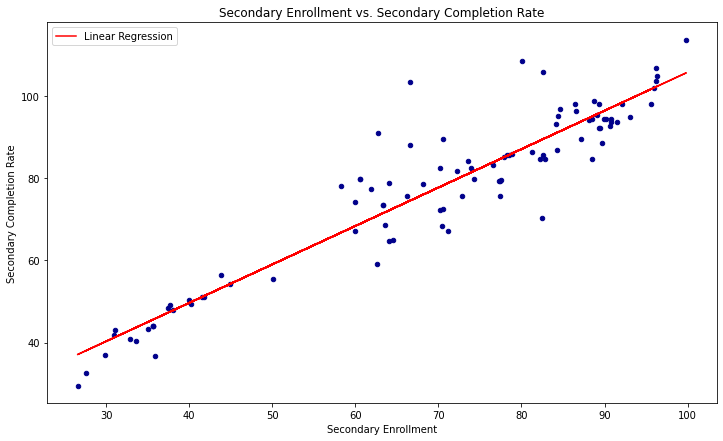

In [9]:
ax = mask.plot.scatter(x=SECONDARY_ENROLLMENT, y=SECONDARY_COMPLETION_RATE, color="DarkBlue", title="Secondary Enrollment vs. Secondary Completion Rate", figsize=(12, 7))
plot1 = mask.plot(x=SECONDARY_ENROLLMENT, y="Linear Regression", ax=ax, color="Red")
plot1.set_xlabel("Secondary Enrollment")
plot1.set_ylabel("Secondary Completion Rate")

### Finally, I will find the correlation between the two variables and print it.

In [10]:
correlation = analysis_data[SECONDARY_ENROLLMENT].corr(analysis_data[SECONDARY_COMPLETION_RATE])
print(round(correlation, 5))

0.93903


# Conclusion

## Most students who enroll in secondary school complete all lower secondary courses.


Looking closer at our fairly high (strong) positive correlation coefficient of 0.9390, we can confidently say that most students who enroll in secondary school complete all lower secondary courses. That is to say, that as Secondary Enrollment increases, we also expect Secondary Completion Rate to increase along with it. Causation can not be established from the analysis performed in this code.